In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [4]:
df.head(6)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import r2_score

In [14]:
x = np.array(df['T2']).reshape(-1,1)
y= np.array(df['T6'])

In [8]:
model = LinearRegression()

In [15]:
model.fit(x,y)

LinearRegression()

In [17]:
y_pred = model.predict(x)
r_squared = r2_score(y,y_pred)

In [18]:
r_squared

0.6418990830855493

In [23]:
df.drop('date',axis=1,inplace = True)

In [24]:
df.drop('lights',axis=1,inplace = True)

In [34]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
normalized = scaler.fit_transform(df)

In [30]:
normalized

array([[0.04672897, 0.32734952, 0.56618659, ..., 0.53846154, 0.26544891,
        0.26544891],
       [0.04672897, 0.32734952, 0.54132648, ..., 0.53393665, 0.37208289,
        0.37208289],
       [0.03738318, 0.32734952, 0.53050179, ..., 0.52941176, 0.57284766,
        0.57284766],
       ...,
       [0.24299065, 0.91974657, 0.53866618, ..., 0.89894419, 0.58397859,
        0.58397859],
       [0.38317757, 0.91974657, 0.54949087, ..., 0.8974359 , 0.12637146,
        0.12637146],
       [0.39252336, 0.91974657, 0.53875791, ..., 0.8959276 , 0.68239057,
        0.68239057]])

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[[ 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']]
y = df['Appliances']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
print(model.intercept_)

-24.665703940402366


In [40]:
model.coef_

array([-7.24132166e-01,  1.62189768e+01, -1.77643903e+01, -1.36157358e+01,
        2.62803343e+01,  4.83719122e+00,  2.67630004e+00,  9.09524590e-01,
       -2.04751051e+00,  2.86704940e-01,  7.21976284e+00,  4.19820154e-01,
        1.22411038e+00, -1.55139533e+00,  9.69424586e+00, -5.76857860e+00,
       -2.09455470e+01, -1.89471329e+00, -1.04496374e+01,  1.89956702e-01,
       -9.62999622e-01,  2.34798764e+00,  2.09183402e-01,  5.22610017e+00,
       -1.01042719e+13,  1.01042719e+13])

In [42]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['coeff'])

In [43]:
cdf

,coeff
T1,-7.241322e-01
RH_1,1.621898e+01
T2,-1.776439e+01
RH_2,-1.361574e+01
T3,2.628033e+01
RH_3,4.837191e+00
T4,2.676300e+00
RH_4,9.095246e-01
T5,-2.047511e+00
RH_5,2.867049e-01


In [44]:
 predictions = model.predict(X_test)

In [45]:
predictions

array([ 45.92804606, 271.55304606,  45.45075114, ...,  76.13117106,
        45.02179606,  81.52179606])

In [46]:
y_test

8980      40
2754      90
9132      50
14359     50
8875      70
        ... 
14782     80
7361     140
10333     60
6695      20
19211     50
Name: Appliances, Length: 6513, dtype: int64

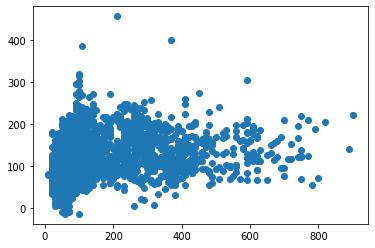

In [47]:
plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

53.746070032178906

In [51]:
metrics.mean_squared_error(y_test,predictions)

8945.903203145192

In [52]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

94.58278491958879